In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
df=pd.read_csv("/content/NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


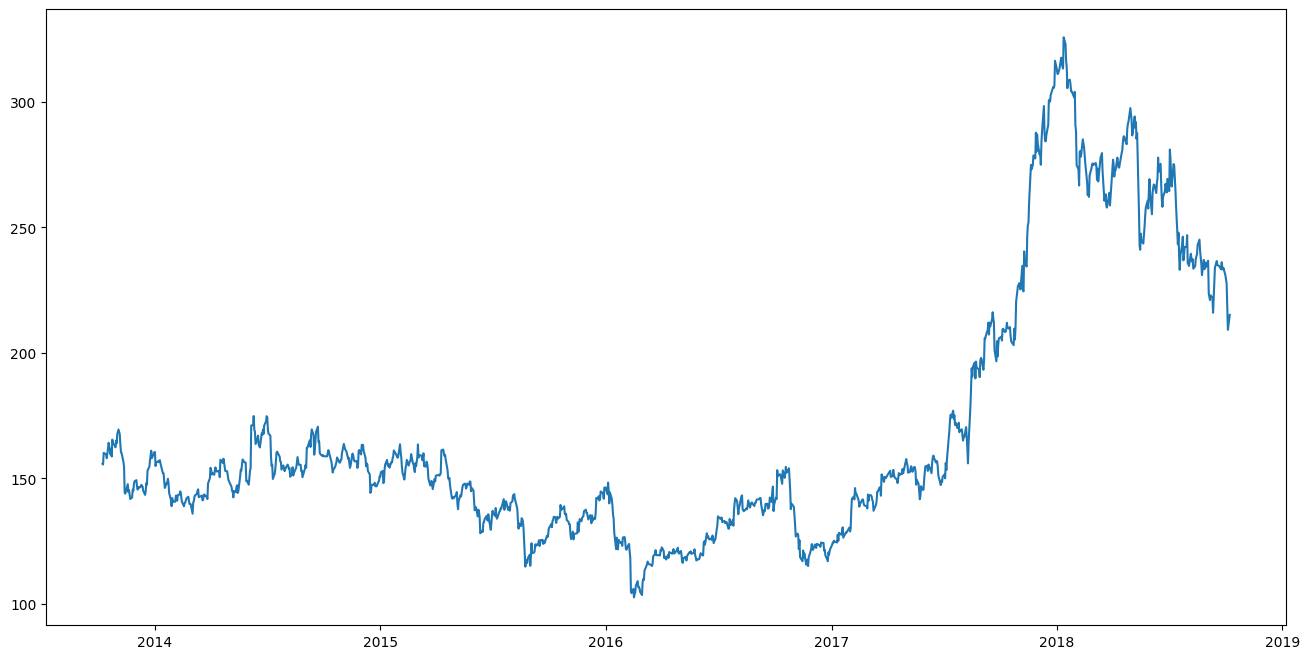

In [25]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [26]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

<ipython-input-26-b6083e9db257>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_dataset["Date"][i]=data['Date'][i]
<ipython-input-26-b6083e9db257>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_dataset["Close"][i]=data["Close"][i]


In [27]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [28]:
final_dataset=new_dataset.values

In [29]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [30]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [31]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [32]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(x_train_data, y_train_data, epochs=50, batch_size=32)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - loss: 7.0648e-04
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 4.2048e-04
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.9066e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 4.0081e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 3.4106e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.3272e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 2.5501e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 2.4035e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 2.5404e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 2.6469e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 2.4714e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.2525e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.9046e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 1.9497e-04
Epoch 15/50
2

In [48]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [49]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)


In [50]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [51]:
valid_data_df = pd.DataFrame(valid_data, columns=['Close'])
valid_data_df['Predictions'] = predicted_closing_price


In [52]:
lstm_model.save('my_model.keras')

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = valid_data_df["Close"].values
y_pred = valid_data_df["Predictions"].values

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate R^2 Score
r2 = r2_score(y_true, y_pred)
print(f"R^2 Score: {r2}")


Mean Squared Error: 42.64208195493368
Mean Absolute Error: 4.823191365888042
Root Mean Squared Error: 6.530090501282022
R^2 Score: 0.9475074157246962


In [57]:
# Assuming `train_data` and `valid_data` are numpy arrays and you have the dates
dates_train = df['Date'][:len(train_data)]
dates_valid = df['Date'][len(train_data):len(train_data) + len(valid_data)]

# Convert to DataFrames
train_data_df = pd.DataFrame(train_data, columns=['Close'], index=dates_train)
valid_data_df = pd.DataFrame(valid_data, columns=['Close'], index=dates_valid)
valid_data_df['Predictions'] = predicted_closing_price


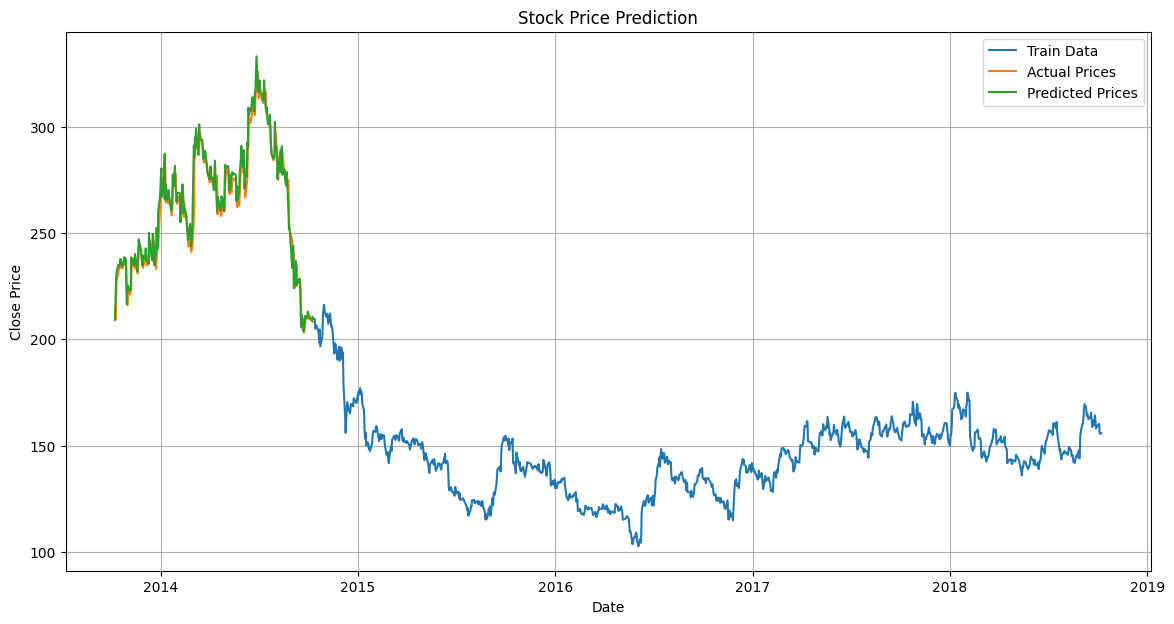

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_data_df.index, train_data_df["Close"], label="Train Data")

# Plot actual prices
plt.plot(valid_data_df.index, valid_data_df["Close"], label="Actual Prices")

# Plot predicted prices
plt.plot(valid_data_df.index, valid_data_df["Predictions"], label="Predicted Prices")

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)  # Optional: Adds grid lines for better readability
plt.show()


In [46]:
!pip3 install dash
!pip3 install dash-html-components
!pip3 install dash-core-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 47.8 MB/s eta 0:00:00


In [60]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np


<ipython-input-60-61323f6fc715>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-60-61323f6fc715>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [61]:
app = dash.Dash()
server = app.server


In [62]:
scaler=MinMaxScaler(feature_range=(0,1))
df_nse = pd.read_csv("/content/NSE-Tata-Global-Beverages-Limited.csv")

df_nse["Date"]=pd.to_datetime(df_nse.Date,format="%Y-%m-%d")
df_nse.index=df_nse['Date']


In [63]:
data=df_nse.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df_nse)),columns=['Date','Close'])

In [64]:
for i in range(0,len(data)):
    new_data["Date"][i]=data['Date'][i]
    new_data["Close"][i]=data["Close"][i]
new_data.index=new_data.Date
new_data.drop("Date",axis=1,inplace=True)
dataset=new_data.values

<ipython-input-64-5ba6f7f9746c>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-64-5ba6f7f9746c>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [65]:
train=dataset[0:987,:]
valid=dataset[987:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [67]:
x_train,y_train=[],[]
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
model=load_model("/content/my_model.keras")
inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

In [68]:
X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)
train=new_data[:987]
valid=new_data[987:]
valid['Predictions']=closing_price

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step


<ipython-input-68-34bfd9958b54>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df= pd.read_csv("/content/stock_data.csv")

In [70]:
app.layout = html.Div([

    html.H1("Stock Price Analysis Dashboard", style={"textAlign": "center"}),

    dcc.Tabs(id="tabs", children=[

        dcc.Tab(label='NSE-TATAGLOBAL Stock Data',children=[
            html.Div([
                html.H2("Actual closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )
                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }
                ),
                html.H2("LSTM Predicted closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )
                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }
                )
            ])
        ]),
        dcc.Tab(label='Facebook Stock Data', children=[
            html.Div([
                html.H1("Facebook Stocks High vs Lows",
                        style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H1("Facebook Market Volume", style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown2',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])
    ])
])
@app.callback(Output('highlow', 'figure'),
              [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["High"],
                     mode='lines', opacity=0.7,
                     name=f'High {dropdown[stock]}',textposition='bottom center'))
        trace2.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Low"],
                     mode='lines', opacity=0.6,
                     name=f'Low {dropdown[stock]}',textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(str(dropdown[i]) for i in selected_dropdown)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Price (USD)"})}
    return figure
@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Volume"],
                     mode='lines', opacity=0.7,
                     name=f'Volume {dropdown[stock]}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(str(dropdown[i]) for i in selected_dropdown_value)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Transactions Volume"})}
    return figure
if __name__=='__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>